# MDL Assignment - 2

## Team Number - 57
## Team Members - Siddik Ayyappa Naraharisetti (2020101089) and Sai Pranathi Kokkalla (2020101083)

Importing all the packages

In [545]:
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plot
import random
import pandas

Extraction of data from the pkl file, using pickle.load()

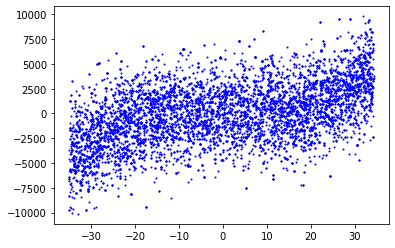

In [546]:
file = open('./train.pkl', 'rb') # make sure the mode is read. And reading must be done in binary.
load_data = pickle.load(file) # the data points are now contained in the load_data variable
number_data = len(load_data) # the length of the data set is in number_data
random.shuffle(load_data)
file.close()

file = open('./test.pkl', 'rb')
test_data_load = pickle.load(file)
number_test_data = len(test_data_load)



test_x = test_data_load[:, 0] # This is the x and y of the testing data sets
test_y = test_data_load[:, 1]


x = load_data[:, 0] # this is the x and y of the training data sets
y = load_data[:, 1]

plot.plot(x, y, 'b.', markersize = 2)


Now we have divided the data into 2 sets, x and y. Now it is time to resample the data.
### Task - 2.2.1: Re-Sampling the data

In [547]:
x_training_data_sets = []
y_training_data_sets = []
for i in range(0, 8000, 500):
    x_training_data_sets.append(x[i:i+500])
    y_training_data_sets.append(y[i:i+500])
    


Now at x_training_data_sets and y_training_data_sets we would be having the training sets delivered randomly.

### Task - 2.2.2 - Task
We shall  get the predicted values. We shall train the model using the training sets and 15 degrees per each training set. For each of them, we shall test it on the testing set. We shal compare the predictions and the actuality.

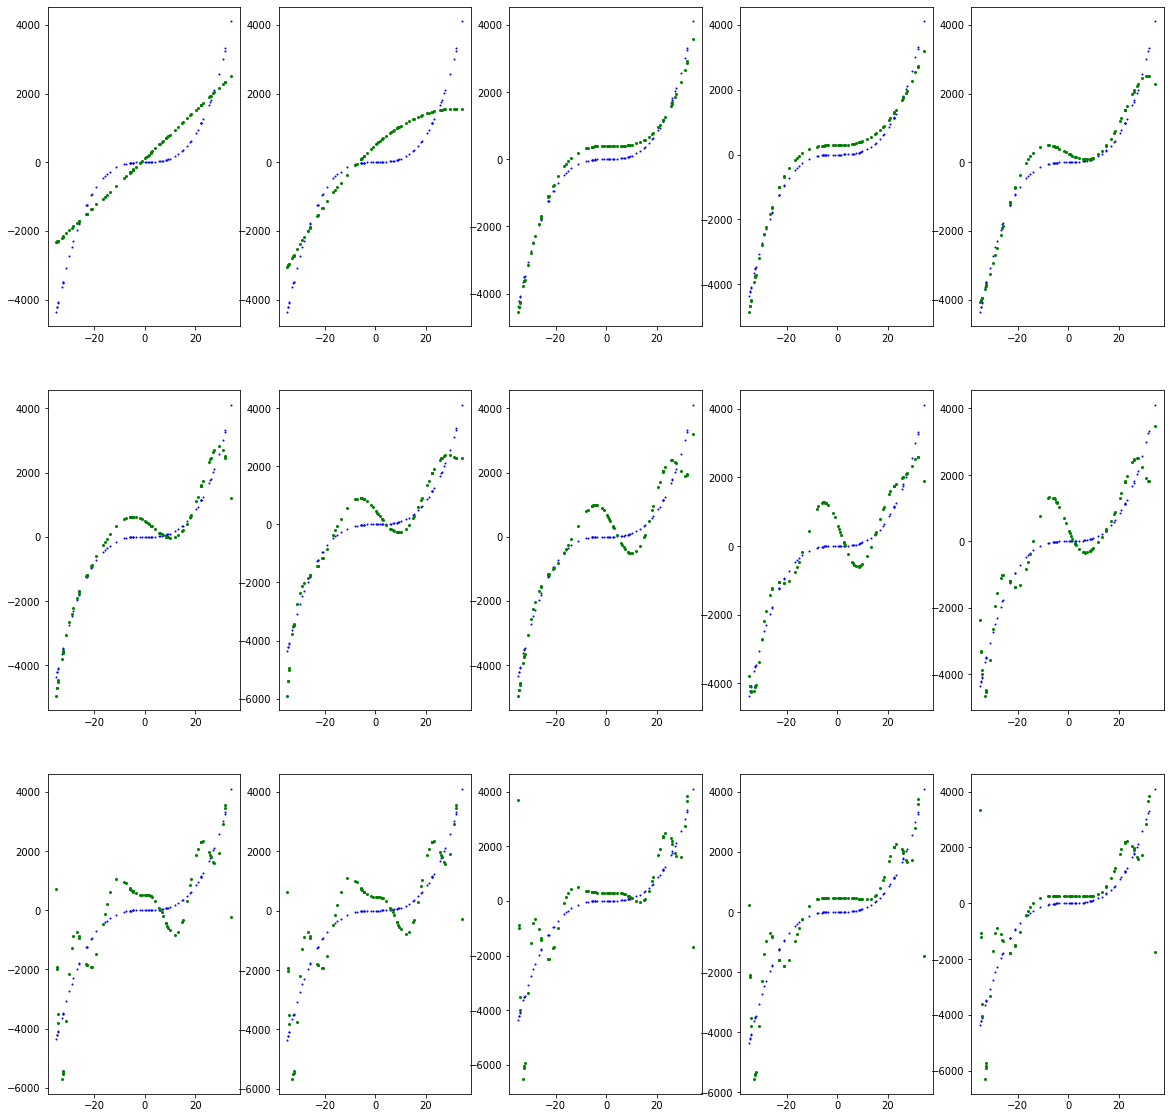

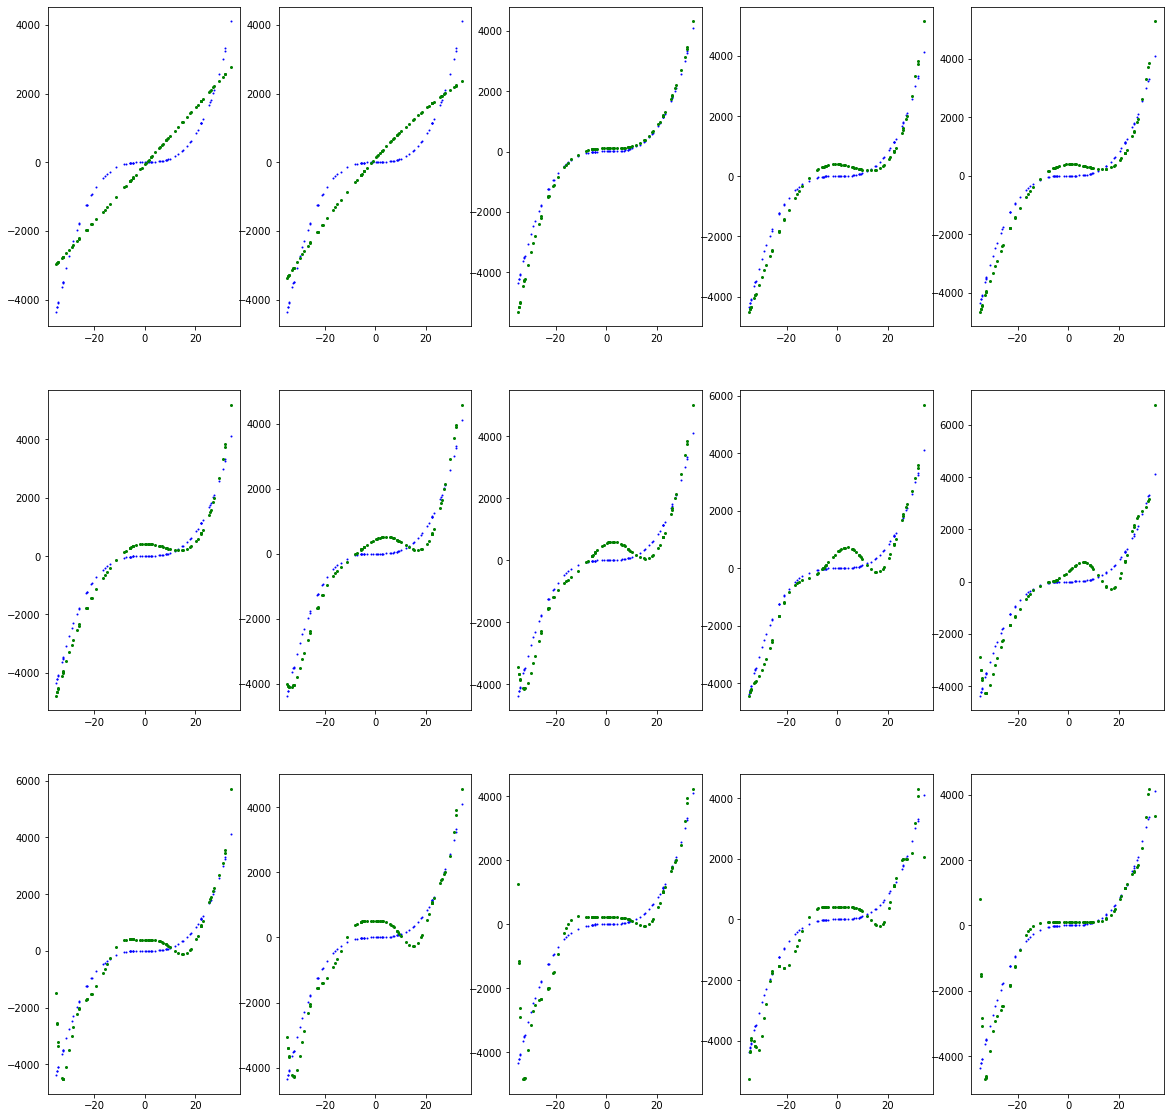

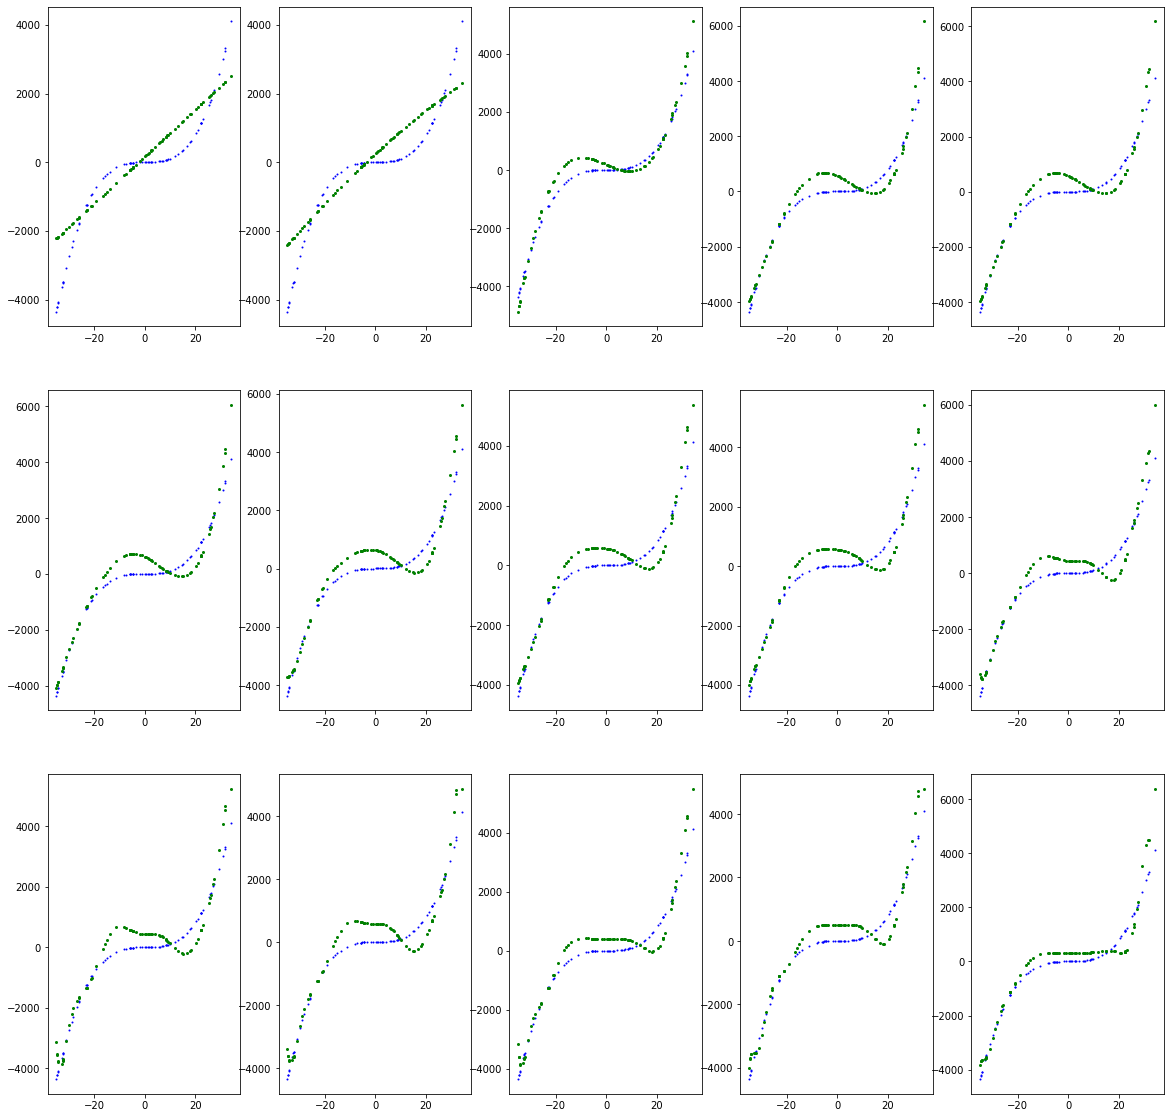

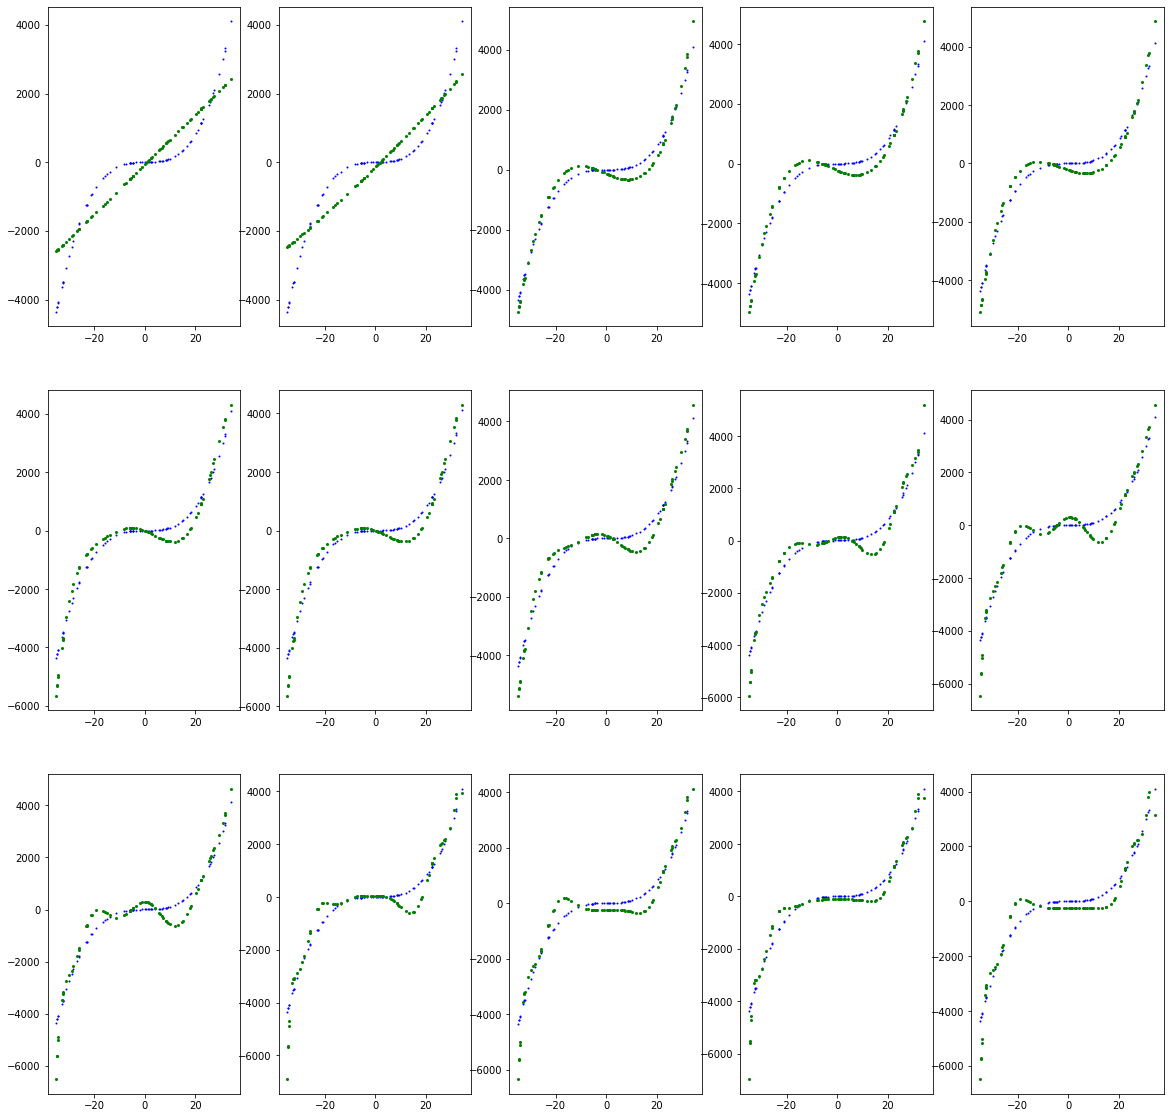

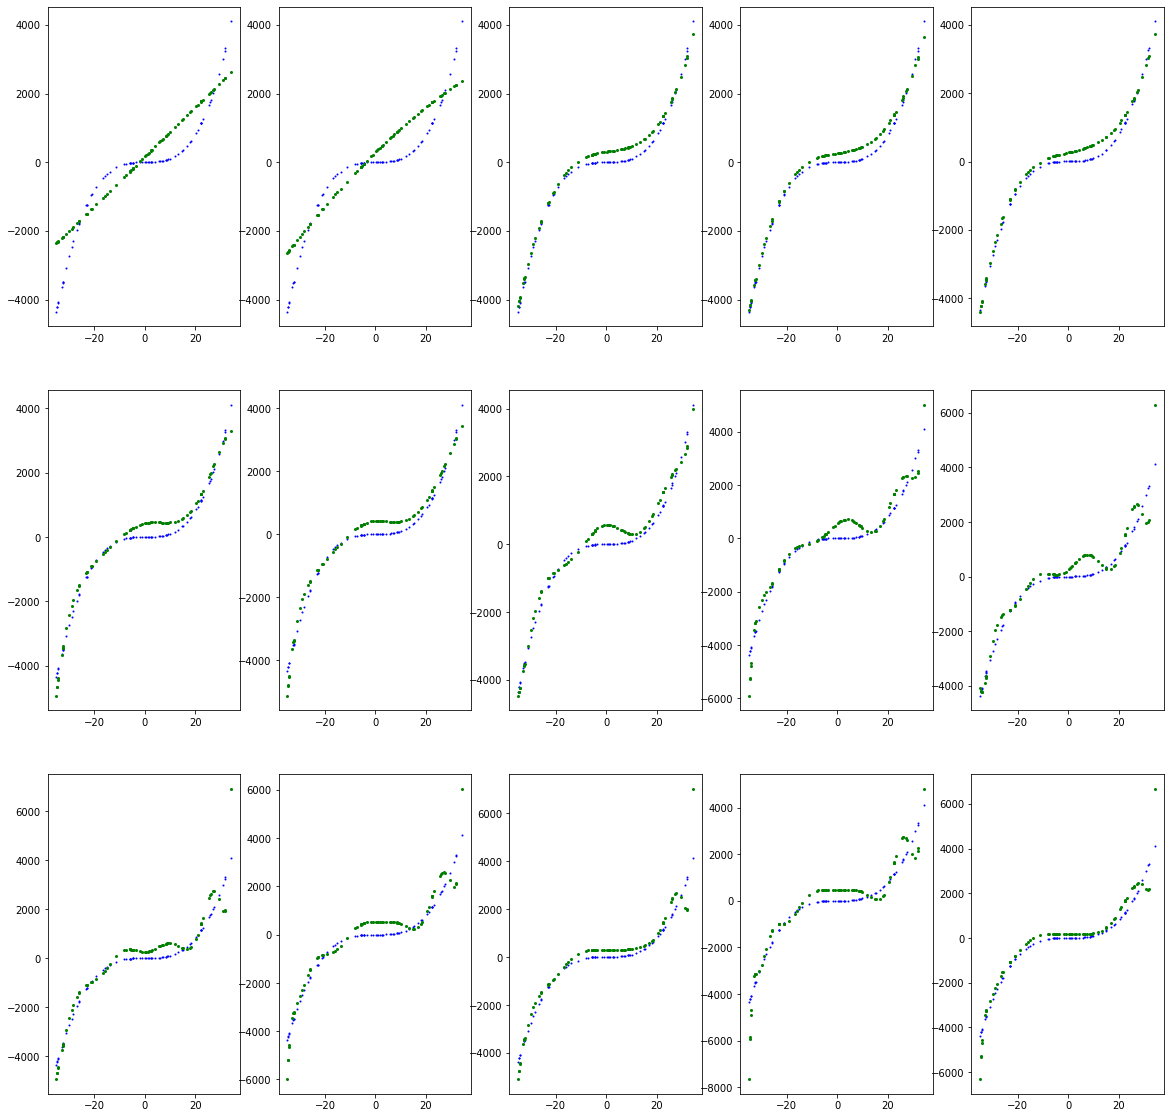

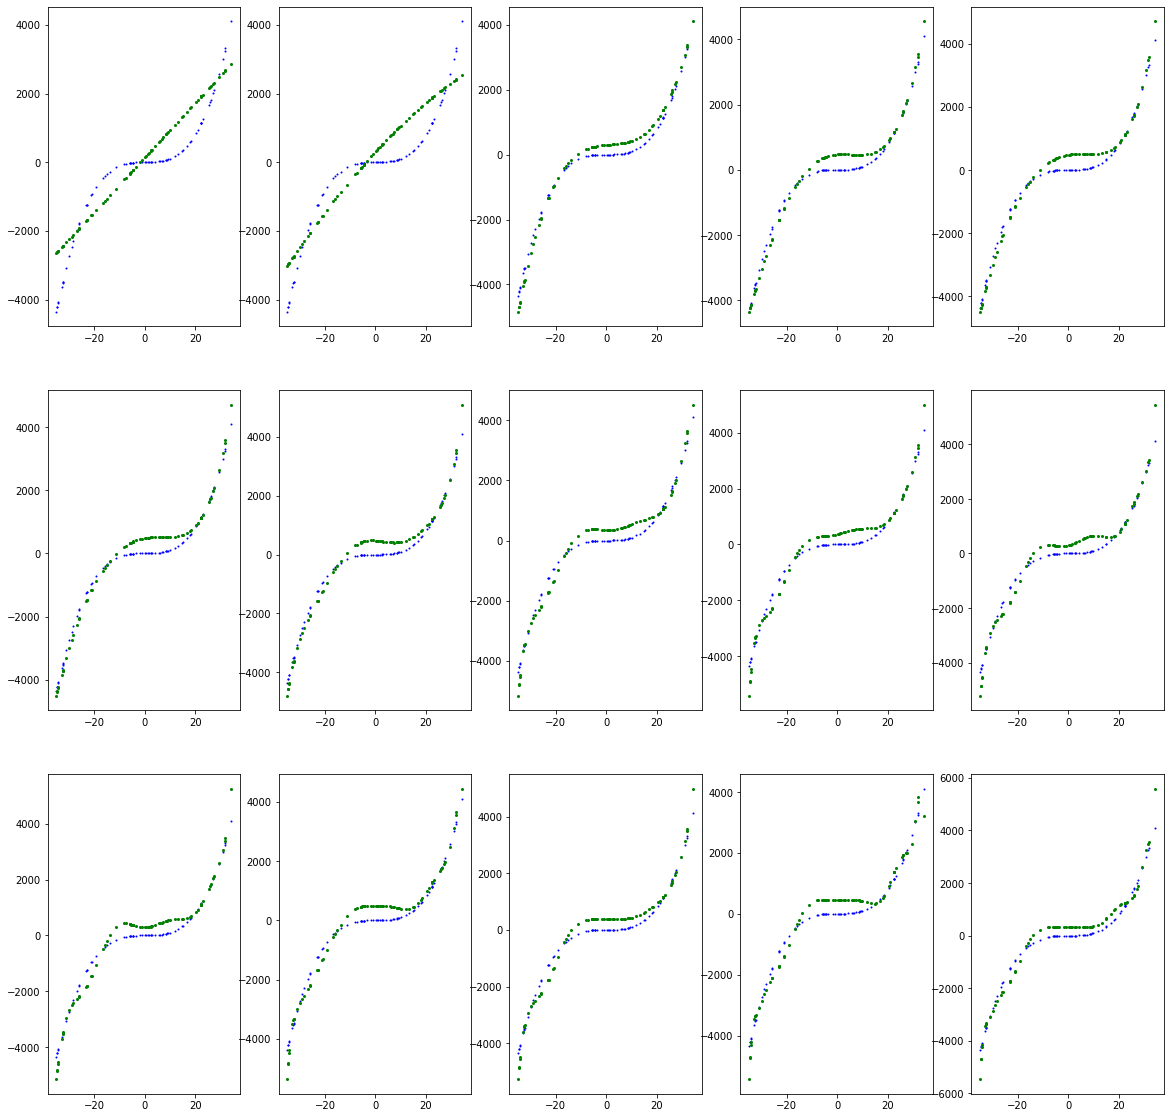

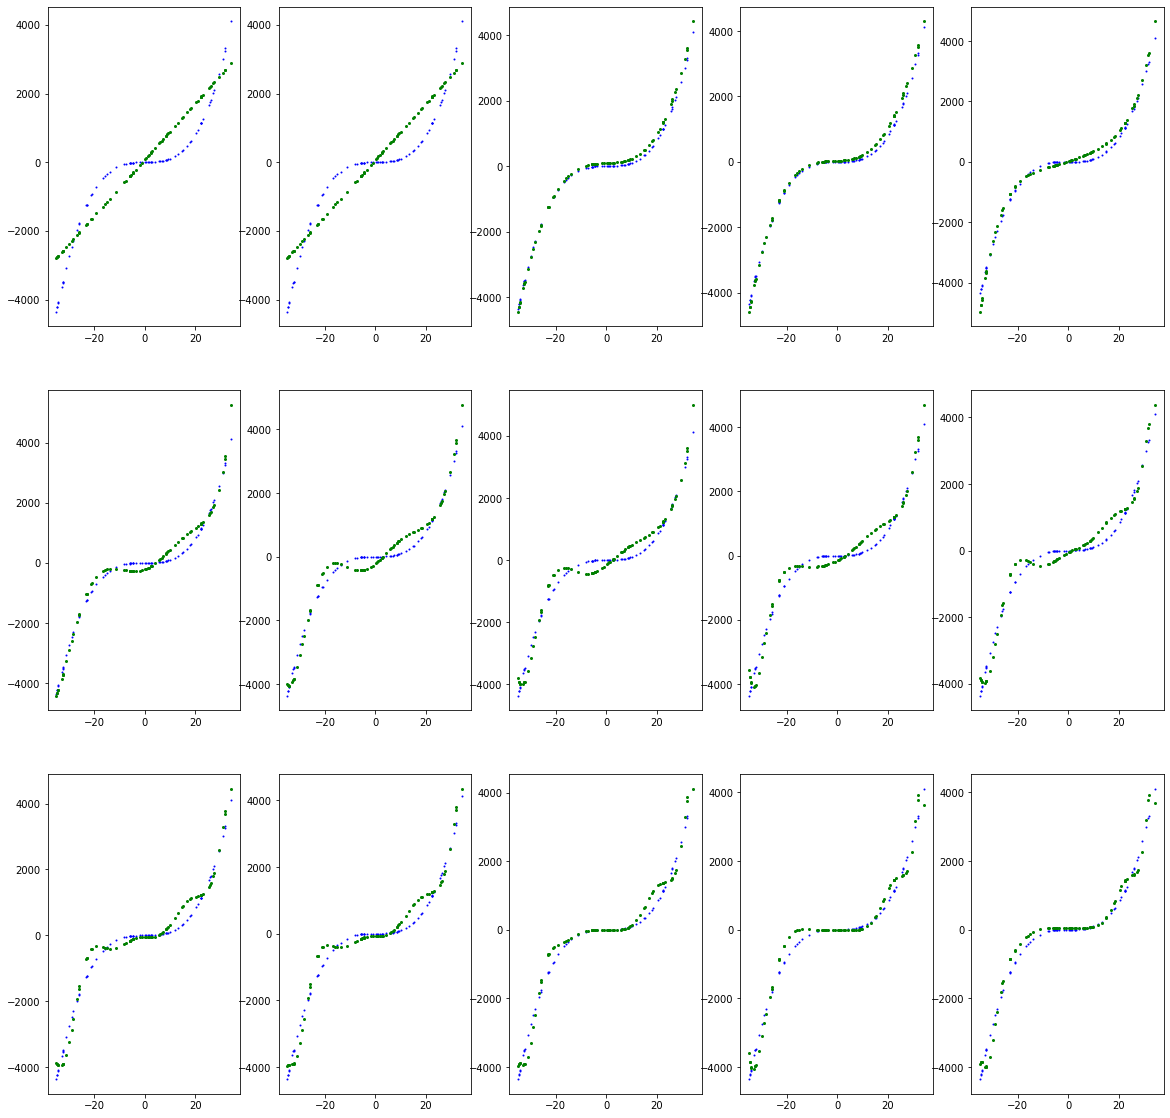

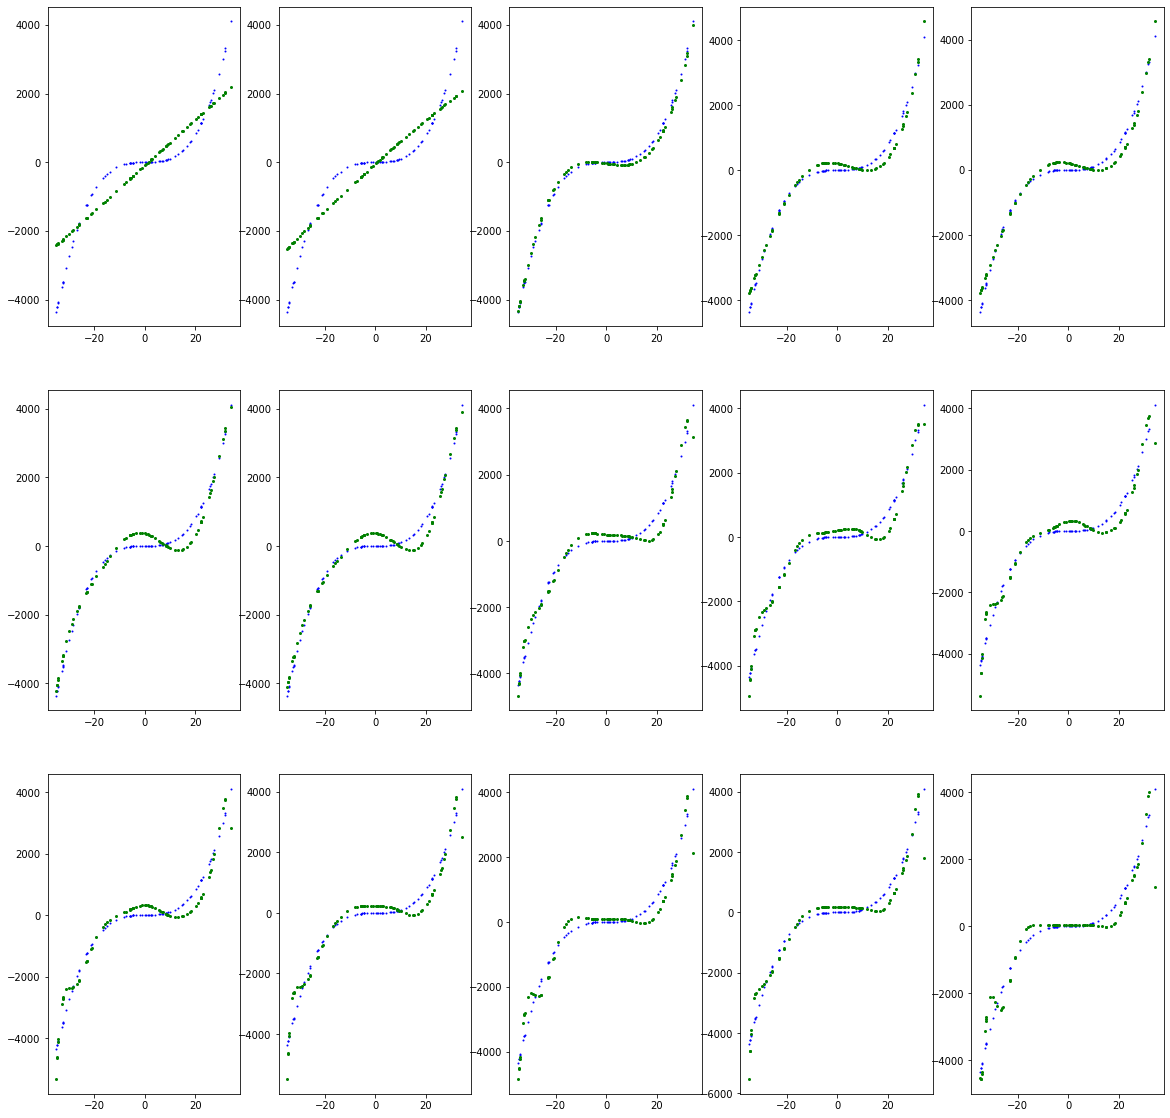

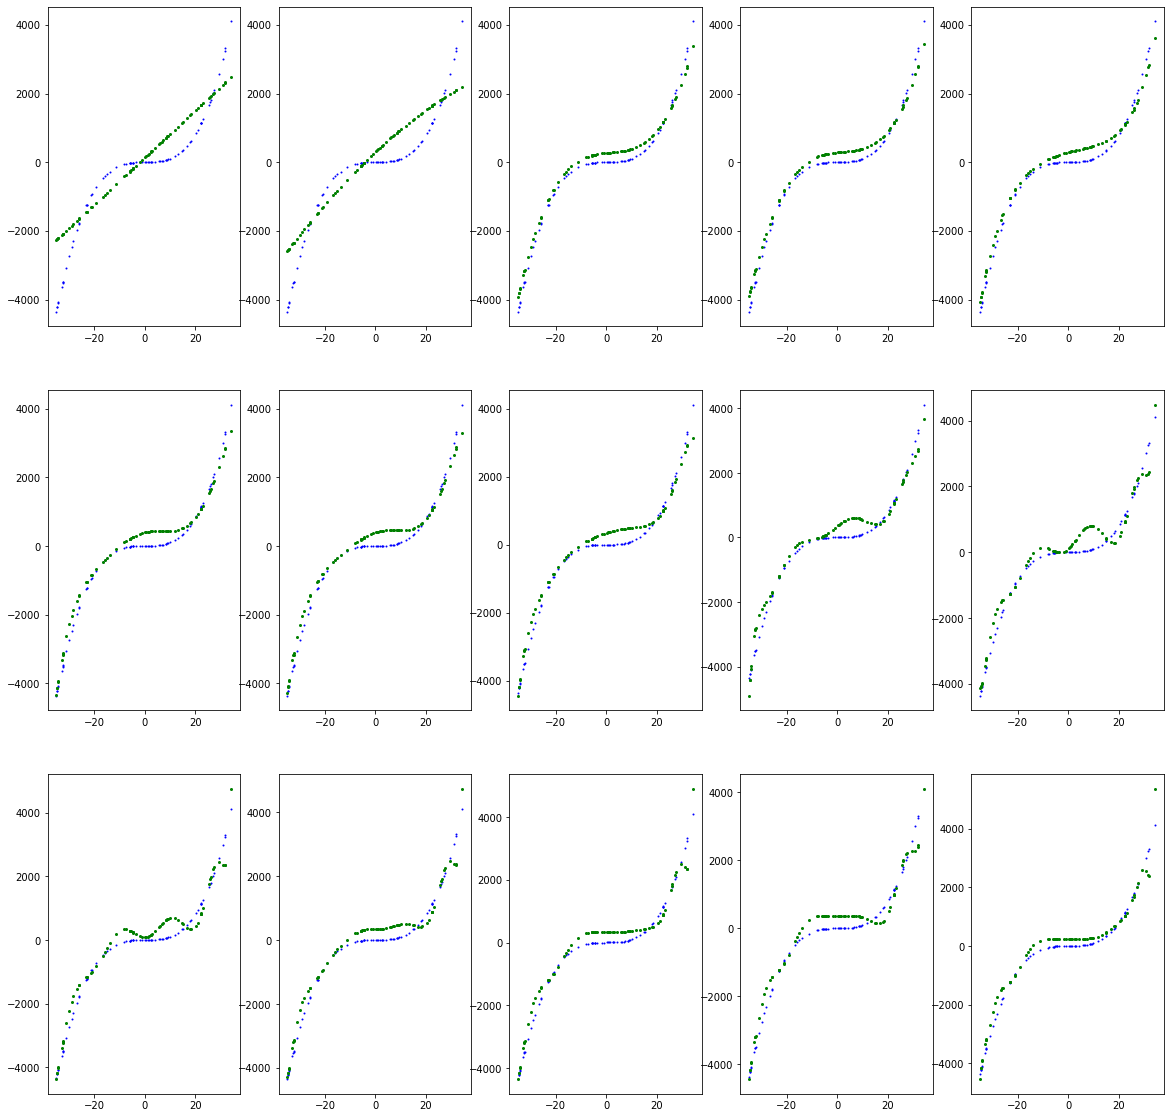

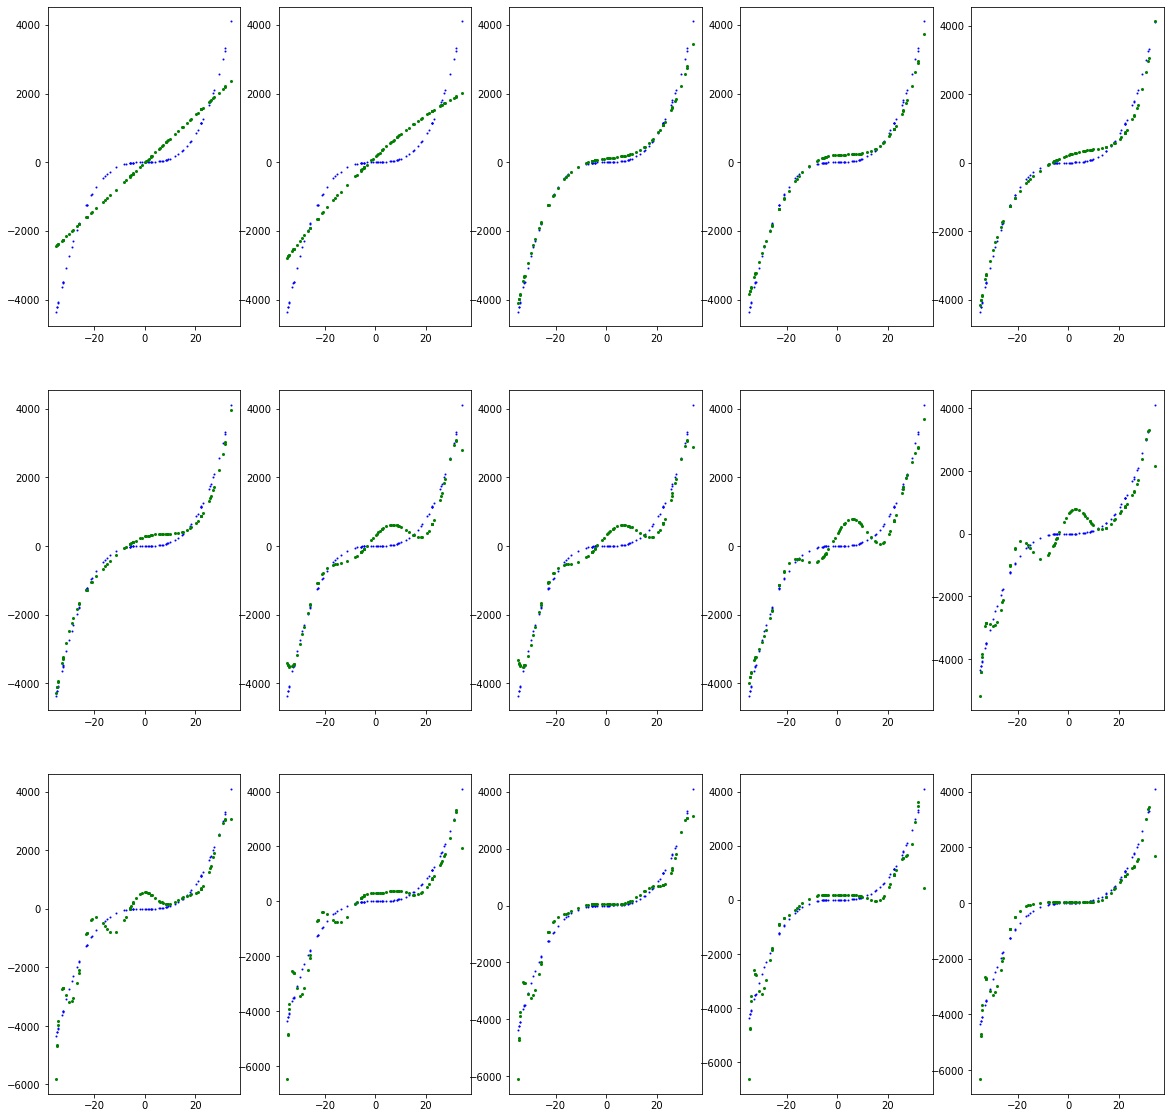

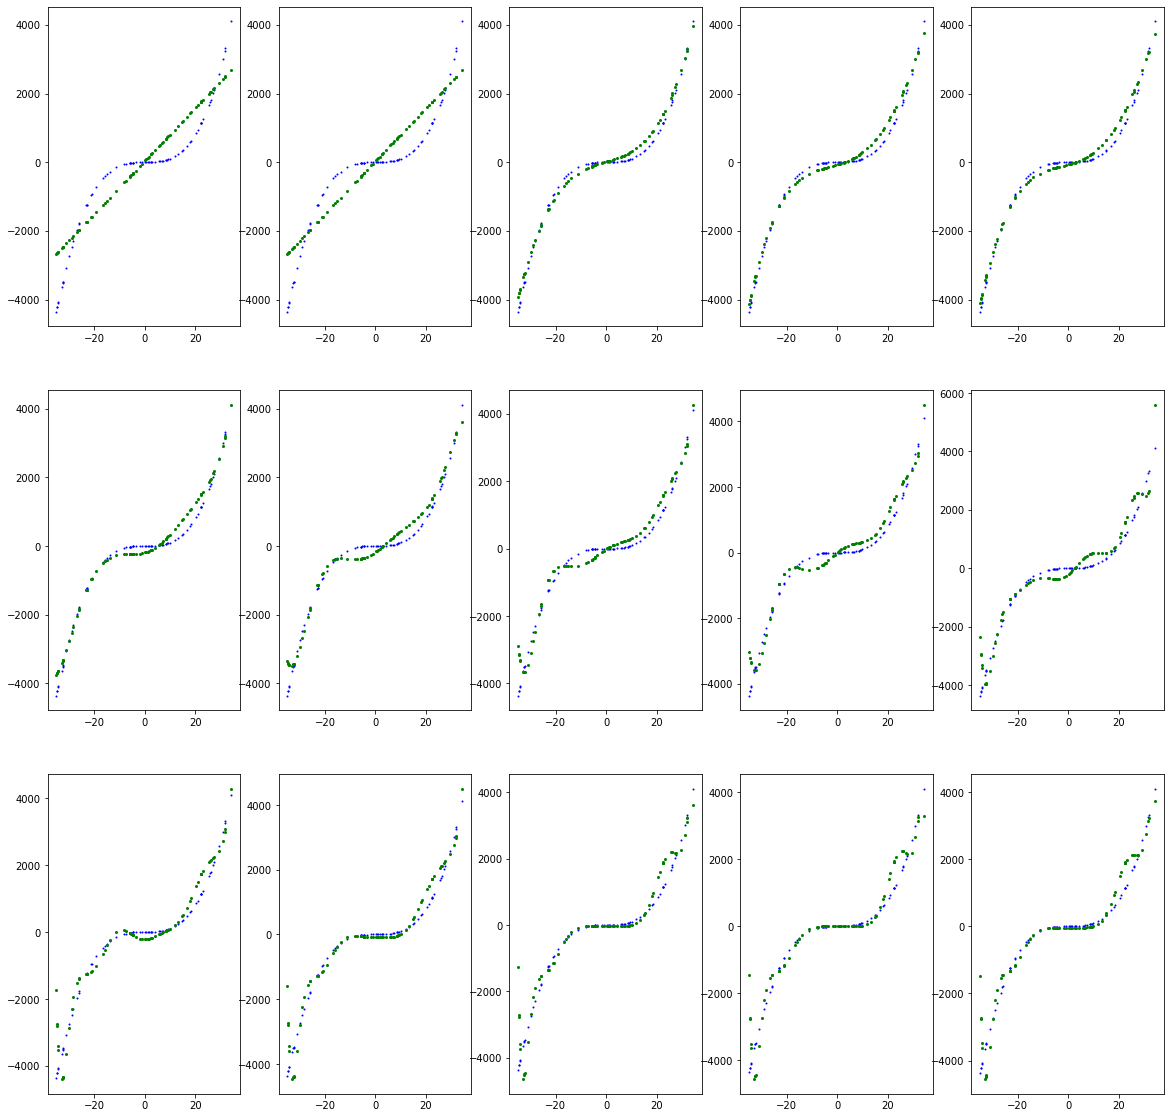

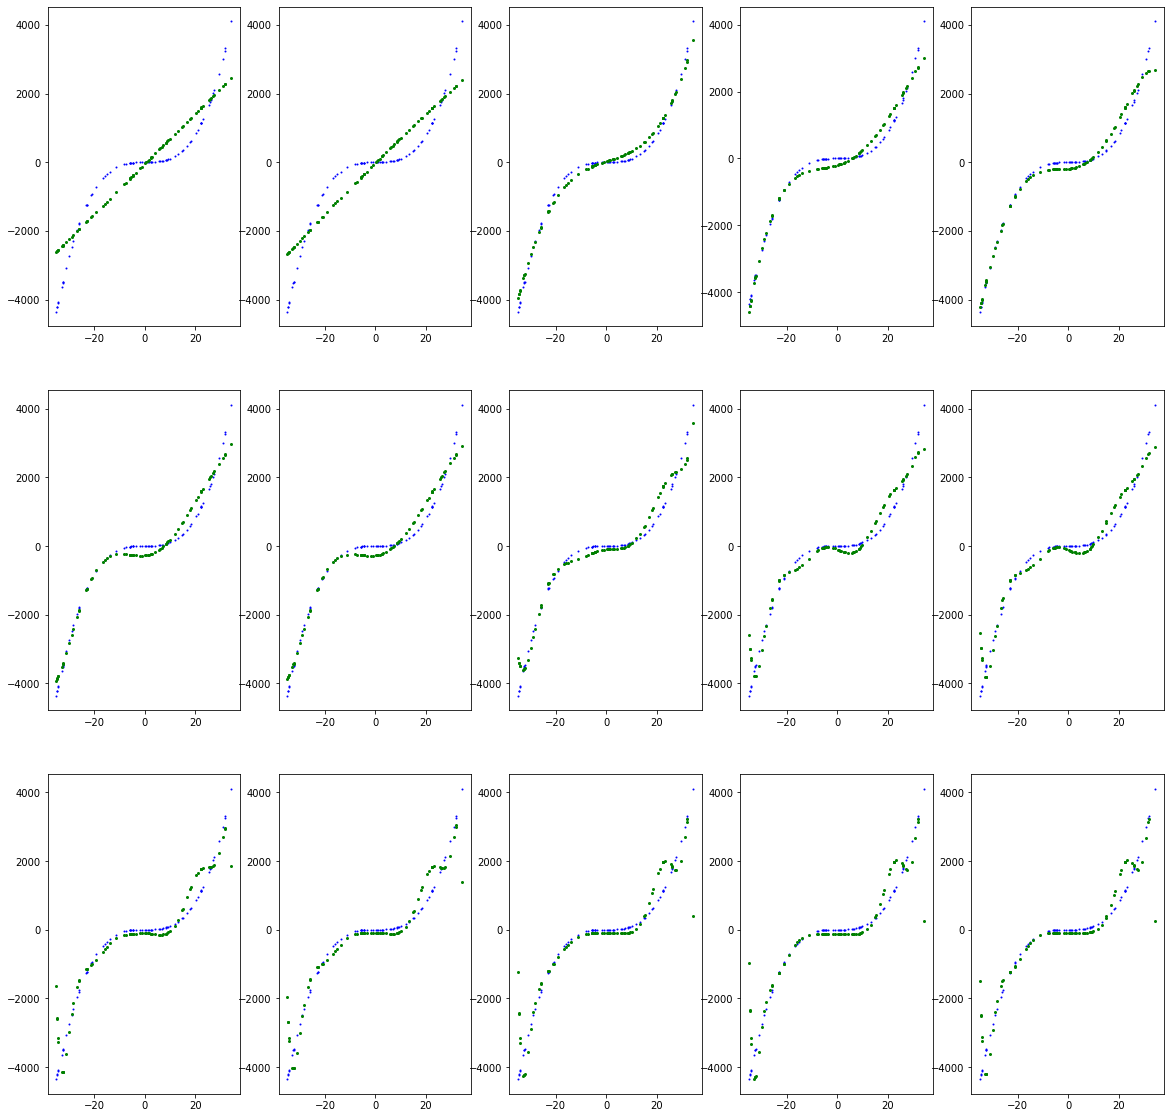

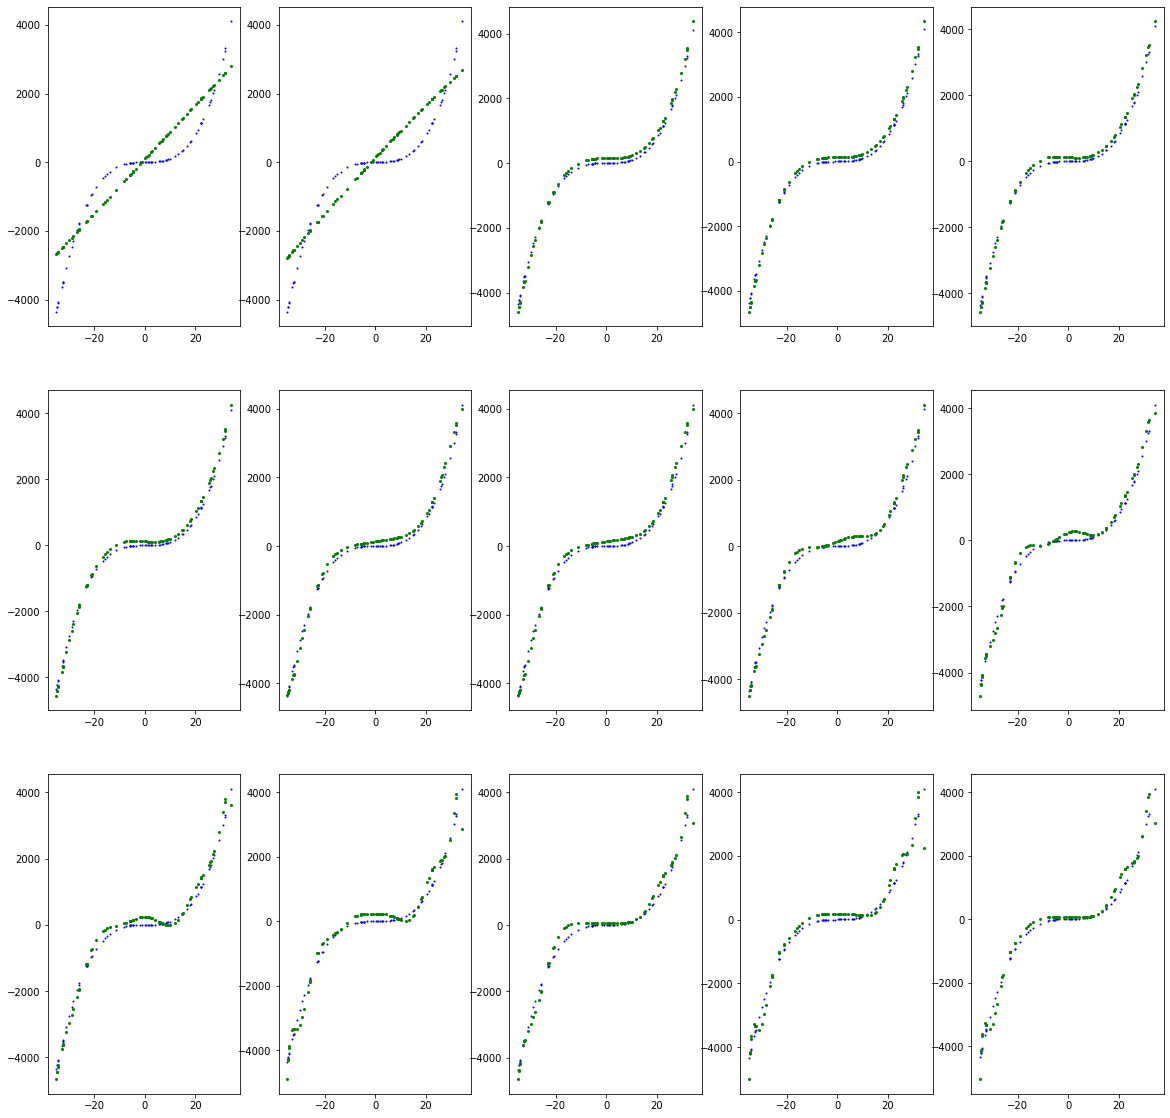

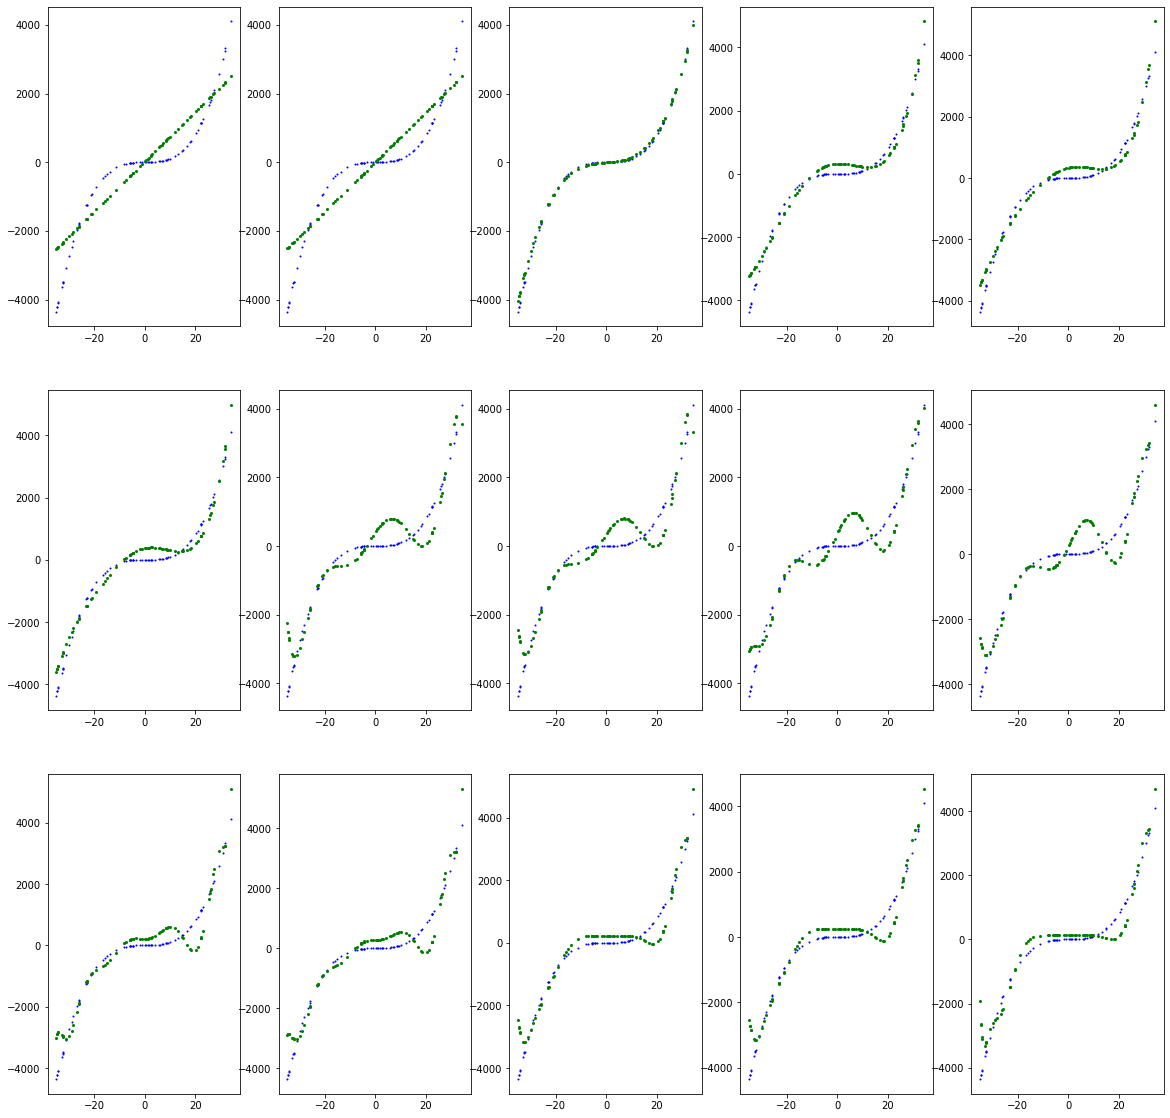

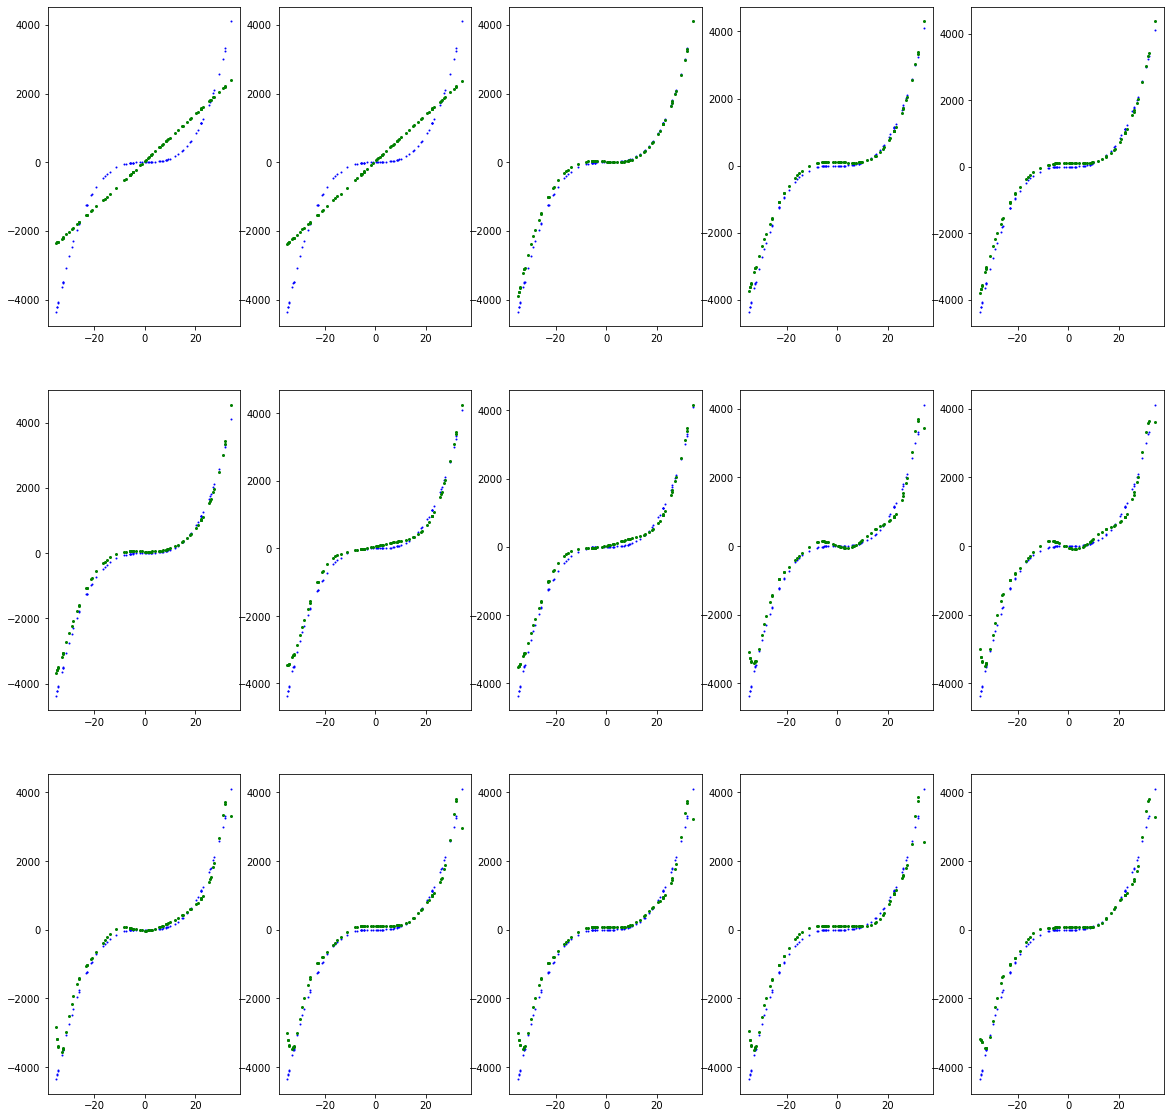

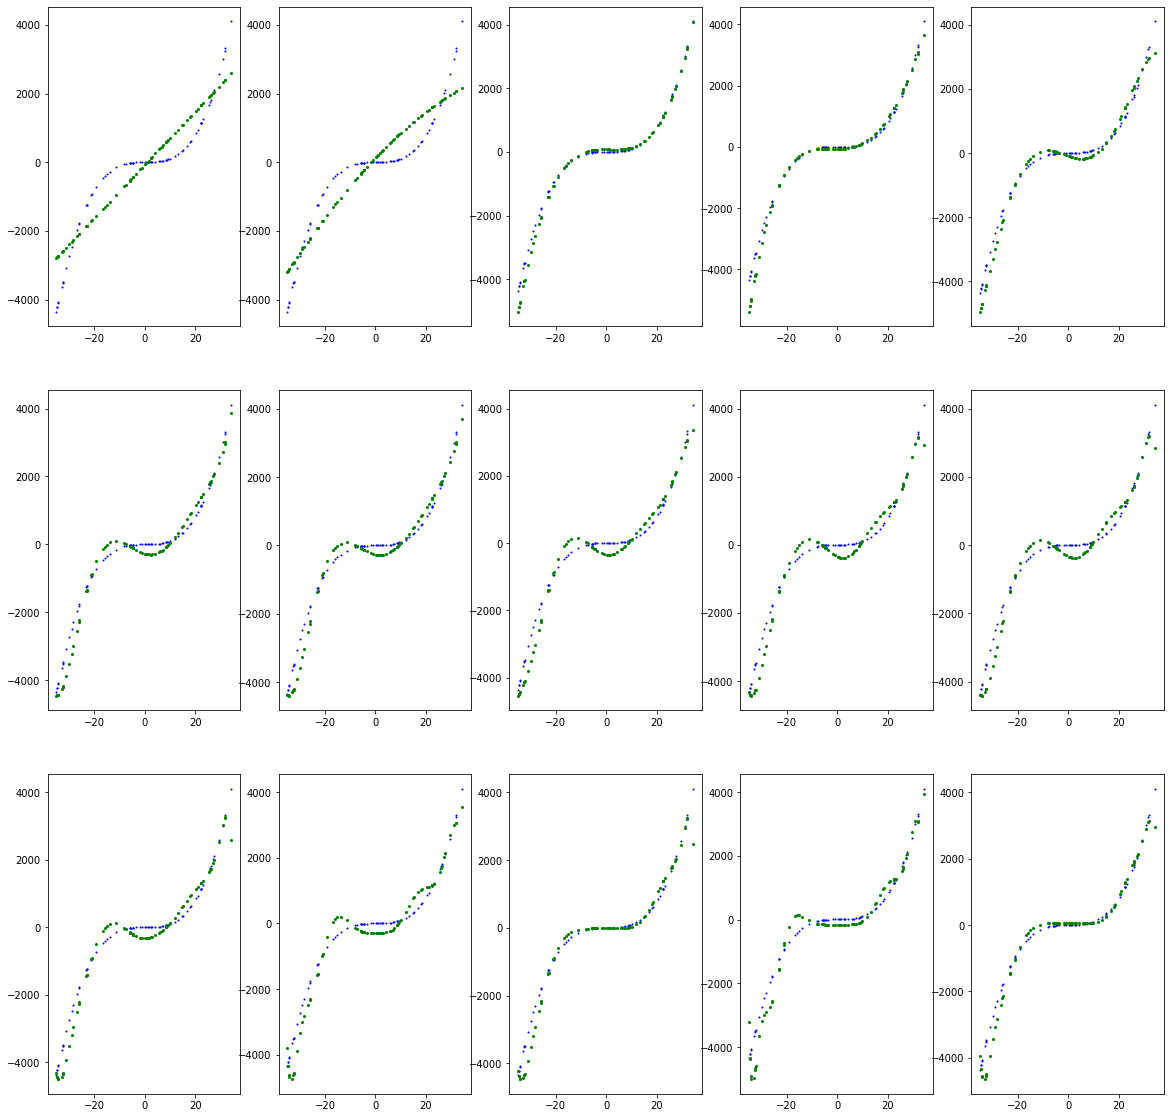

In [548]:
predicted_data_sets = []
# this data set is supposed to store all the predicted data sets, for y.
for i in range(16):
    
    fig, axes = plot.subplots(nrows=3, ncols=5, figsize=(20, 20))
    x = x_training_data_sets[i][:, np.newaxis]
    y = y_training_data_sets[i]
    ar = []
    for degree in range(0, 15):
        model = LinearRegression() #  Now we shall train the linear regression model for the training set
        axes[int(degree/5)][degree % 5].plot(test_x, test_y, 'b.', markersize = 2)
        
        x_train_poly = PolynomialFeatures(degree = degree+1).fit_transform(x) 
        model.fit(x_train_poly, y) # THis is the step where we train the model, for 
        # since we are told to calculate the variance and bias based on the test set.
        y_predicted = model.predict(PolynomialFeatures(degree = degree+1).fit_transform(test_x[:, np.newaxis]))
        ar.append(y_predicted) # this is a temporary array with which 
        axes[int(degree/5)][degree % 5].plot(test_x[:, np.newaxis], y_predicted, 'g.', markersize=4)
    predicted_data_sets.append(ar)


Now we have clearly seen the models trained with various sets. We shall now use the set of predicted values for each of the model for each degree and use them to calculate the Bias and variance followed by the Irredcuible Error. The variable **predicted_data_sets** has the set of predicted values for the model with test set.
### 

In [549]:
b = []
b2=[]
v = []
MSE=[]
index = []
irr_err = np.zeros(15)

for i in range(15):
    y_predicted_part = []
    for j in range(16):
        dum= predicted_data_sets[j][i]
        y_predicted_part.append(dum)
    y_predicted_part = np.asarray(y_predicted_part)
    Bias = np.abs(np.mean(y_predicted_part, axis=0) - test_y)
    Variance = np.var(y_predicted_part, axis=0)
  
    b.append(np.mean(Bias))
    v.append(np.mean(Variance))

    sqr=(np.mean(y_predicted_part,axis=0) - test_y)
    sqr=sqr**2
    b2.append(np.mean(sqr))

    square=np.square( y_predicted_part- test_y)
    mse=np.mean(square,axis=0)
    MSE.append(np.mean(mse))
    index.append(i)


irr_err = np.array(MSE) -  np.array(v)  - np.array(b2)

print("Bias:", b)
print("Variance:", v)
print("Ir_err:", irr_err)
print("MSE:", MSE)

Bias: [583.0186160040332, 573.4551481054613, 70.76539779539591, 75.93746976716086, 75.23810503694162, 70.90827550158447, 104.69228276771373, 109.18309045520402, 105.24052041548055, 128.1067237291648, 118.81508335426035, 133.41304693224492, 135.40586083078864, 161.93985593738427, 126.10616940716163]
Variance: [18555.822471117797, 31624.20794676282, 48909.19267836453, 76554.33419611472, 82427.52820509236, 99437.30094305865, 129563.55281397677, 137375.44993986018, 161658.0810607371, 195359.5608464411, 249584.43381871772, 249973.16915916404, 312670.5751725399, 251598.9770234081, 305577.8767951758]
Ir_err: [ 0.00000000e+00  0.00000000e+00 -4.54747351e-12  9.09494702e-12
 -1.81898940e-12 -1.09139364e-11  0.00000000e+00  3.63797881e-12
  1.81898940e-11  1.81898940e-11  1.81898940e-11  7.27595761e-12
 -2.18278728e-11  1.45519152e-11  7.27595761e-12]
MSE: [530850.4095295994, 510646.5079081783, 55383.09124901497, 86184.11622940729, 91894.57373119894, 109679.34799863593, 145038.27967253822, 15511

Now we have found the bias, variance, mean square error, irreducible error for all the degrees. Now since, that we have all the things in hand, we shall now begin to answer the questions.

### Task - 2.3: The Irreducible Error

In [550]:
table = dict()
table['Degrees'] = range(1, 16)
table['Irreducible Error'] = irr_err
table['Bias'] = b

table['Variance'] = v
table['MSE'] = MSE

data_frame = pandas.DataFrame(table)
print(data_frame)

    Degrees  Irreducible Error        Bias       Variance            MSE
0         1       0.000000e+00  583.018616   18555.822471  530850.409530
1         2       0.000000e+00  573.455148   31624.207947  510646.507908
2         3      -4.547474e-12   70.765398   48909.192678   55383.091249
3         4       9.094947e-12   75.937470   76554.334196   86184.116229
4         5      -1.818989e-12   75.238105   82427.528205   91894.573731
5         6      -1.091394e-11   70.908276   99437.300943  109679.347999
6         7       0.000000e+00  104.692283  129563.552814  145038.279673
7         8       3.637979e-12  109.183090  137375.449940  155112.690102
8         9       1.818989e-11  105.240520  161658.081061  179136.284937
9        10       1.818989e-11  128.106724  195359.560846  219538.799782
10       11       1.818989e-11  118.815083  249584.433819  275706.508248
11       12       7.275958e-12  133.413047  249973.169159  277589.747305
12       13      -2.182787e-11  135.405861  312670.

The Report for Task - 2.3 shall be found in the report.pdf file in the same  directory.

### Task - 2.4: Plotting the Bias^2-Variance Graph

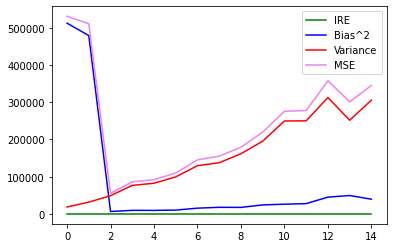

In [551]:
plot.plot(index, irr_err, color = "green")
plot.plot(index, b2, color = "blue")
plot.plot(index, v, color = "red")
plot.plot(index, MSE, color = "violet")
plot.legend(["IRE", "Bias^2", "Variance", "MSE"])
plot.show()
